In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("demographic.csv")

In [ ]:
df.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74,Homeowner,Single Female,1,None/Unknown,16


In [ ]:
df.columns

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'household_key'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [ ]:
df = df.drop(['household_key'],axis = 1)

In [ ]:
df = df[df['HOMEOWNER_DESC']!='Unknown']

In [ ]:
un1 = list(df.HOMEOWNER_DESC.unique())
fur = pd.DataFrame(un1, columns=['furnishing'])
fur

,furnishing
0,Homeowner
1,Renter
2,Probable Renter
3,Probable Owner


In [ ]:
df.loc[df['HOMEOWNER_DESC'] == 'Probable Renter', 'HOMEOWNER_DESC'] = 'Renter'
df.loc[df['HOMEOWNER_DESC'] == 'Probable Owner', 'HOMEOWNER_DESC'] = 'Homeowner'

In [ ]:
un1 = list(df.HOMEOWNER_DESC.unique())
fur = pd.DataFrame(un1, columns=['owner_type'])
fur

,owner_type
0,Homeowner
1,Renter


In [ ]:
un1 = list(df.INCOME_DESC.unique())
fur = pd.DataFrame(un1, columns=['fu'])
fur

,fu
0,35-49
1,50-74
2,75-99
3,0-15
4,100-124
5,25-34
6,125-149
7,15-24
8,150-174
9,250+


In [ ]:
fd = df[['INCOME_DESC']]
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 799
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INCOME_DESC  568 non-null    object
dtypes: object(1)
memory usage: 8.9+ KB


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
fd['new_sal'] = fd.INCOME_DESC.apply(convert_sqft_to_num)
fd.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,INCOME_DESC,new_sal
0,35-49,42.0
1,50-74,62.0
3,75-99,87.0
4,50-74,62.0
5,0-15,7.5


In [ ]:
un1 = list(fd.new_sal.unique())
fur2 = pd.DataFrame(un1, columns=['fu'])
fur2

,fu
0,42.0
1,62.0
2,87.0
3,7.5
4,112.0
5,29.5
6,137.0
7,19.5
8,162.0
9,NaN


In [ ]:
df2 = pd.merge(df,fd,left_index=True, right_index=True)
df2.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal
0,65+,A,35-49,Homeowner,2 Adults No Kids,2,None/Unknown,35-49,42.0
1,45-54,A,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
3,25-34,U,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0
4,45-54,B,50-74,Homeowner,Single Female,1,None/Unknown,50-74,62.0
5,65+,B,0-15,Homeowner,2 Adults No Kids,2,None/Unknown,0-15,7.5


In [ ]:
df2.dropna()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal
0,65+,A,35-49,Homeowner,2 Adults No Kids,2,None/Unknown,35-49,42.0
1,45-54,A,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
3,25-34,U,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0
4,45-54,B,50-74,Homeowner,Single Female,1,None/Unknown,50-74,62.0
5,65+,B,0-15,Homeowner,2 Adults No Kids,2,None/Unknown,0-15,7.5
...,...,...,...,...,...,...,...,...,...
794,45-54,B,35-49,Homeowner,Single Female,1,None/Unknown,35-49,42.0
795,35-44,A,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
796,35-44,U,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
797,45-54,A,75-99,Homeowner,Unknown,3,1,75-99,87.0


In [ ]:
df2 = df2[df2['HH_COMP_DESC']!='Unknown']

In [ ]:
df2.loc[df2['KID_CATEGORY_DESC'] == 'None/Unknown', 'KID_CATEGORY_DESC'] = 0
df2

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal
0,65+,A,35-49,Homeowner,2 Adults No Kids,2,0,35-49,42.0
1,45-54,A,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0
3,25-34,U,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0
4,45-54,B,50-74,Homeowner,Single Female,1,0,50-74,62.0
5,65+,B,0-15,Homeowner,2 Adults No Kids,2,0,0-15,7.5
...,...,...,...,...,...,...,...,...,...
792,45-54,B,75-99,Homeowner,Single Male,1,0,75-99,87.0
794,45-54,B,35-49,Homeowner,Single Female,1,0,35-49,42.0
795,35-44,A,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0
796,35-44,U,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0


In [ ]:
un1 = list(df2.KID_CATEGORY_DESC.unique())
fur = pd.DataFrame(un1, columns=['kid category'])
fur

,kid category
0,0
1,2
2,1


In [ ]:
df2 = df2[df2['new_sal']!= 'NaN']
df2 = df2[df2['KID_CATEGORY_DESC']!= '3+']

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 799
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             464 non-null    object 
 1   MARITAL_STATUS_CODE  464 non-null    int64  
 2   INCOME_DESC_x        464 non-null    object 
 3   HOMEOWNER_DESC       464 non-null    object 
 4   HH_COMP_DESC         464 non-null    object 
 5   HOUSEHOLD_SIZE_DESC  464 non-null    object 
 6   KID_CATEGORY_DESC    464 non-null    object 
 7   INCOME_DESC_y        464 non-null    object 
 8   new_sal              455 non-null    float64
 9   age_cat              464 non-null    int64  
 10  own                  464 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 43.5+ KB


In [ ]:
df2['KID_CATEGORY_DESC'].astype(int)

0      0
1      0
3      2
4      0
5      0
      ..
792    0
794    0
795    0
796    0
799    0
Name: KID_CATEGORY_DESC, Length: 464, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['age_cat']=labelencoder.fit_transform(df2['AGE_DESC'])
df2['own']=labelencoder.fit_transform(df2['HOMEOWNER_DESC'])
df2['MARITAL_STATUS_CODE']=labelencoder.fit_transform(df2['MARITAL_STATUS_CODE'])
df2.head(10)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal,age_cat,own
0,65+,0,35-49,Homeowner,2 Adults No Kids,2,0,35-49,42.0,5,0
1,45-54,0,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0,3,0
3,25-34,2,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0,1,0
4,45-54,1,50-74,Homeowner,Single Female,1,0,50-74,62.0,3,0
5,65+,1,0-15,Homeowner,2 Adults No Kids,2,0,0-15,7.5,5,0
6,45-54,0,100-124,Homeowner,2 Adults No Kids,2,0,100-124,112.0,3,0
8,25-34,0,75-99,Renter,2 Adults No Kids,2,0,75-99,87.0,1,1
9,45-54,0,75-99,Homeowner,2 Adults No Kids,2,0,75-99,87.0,3,0
11,45-54,2,25-34,Renter,Single Female,1,0,25-34,29.5,3,1
12,35-44,1,35-49,Homeowner,2 Adults No Kids,2,0,35-49,42.0,2,0


In [ ]:
df2=df2.dropna()

In [ ]:
df3 = df2[['age_cat','new_sal','own','MARITAL_STATUS_CODE','HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC']]
df3

,age_cat,new_sal,own,MARITAL_STATUS_CODE,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,5,42.0,0,0,2,0
1,3,62.0,0,0,2,0
3,1,87.0,0,2,4,2
4,3,62.0,0,1,1,0
5,5,7.5,0,1,2,0
...,...,...,...,...,...,...
792,3,87.0,0,1,1,0
794,3,42.0,0,1,1,0
795,2,62.0,0,0,2,0
796,2,62.0,0,2,2,0


In [ ]:
df3['KID_CATEGORY_DESC'] = df3['KID_CATEGORY_DESC'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


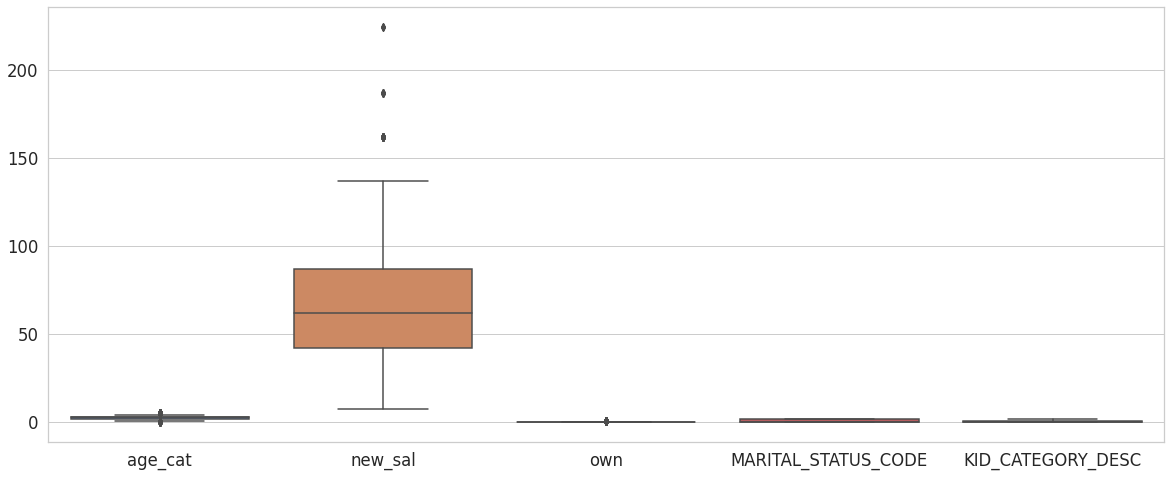

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')


sns.boxplot(data=df3);

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
x = df3.loc[:].values

In [ ]:
x

array([[5, 42.0, 0, 0, '2', 0],
       [3, 62.0, 0, 0, '2', 0],
       [1, 87.0, 0, 2, '4', 2],
       ...,
       [2, 62.0, 0, 0, '2', 0],
       [2, 62.0, 0, 2, '2', 0],
       [1, 62.0, 0, 2, '2', 0]], dtype=object)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df3)
pf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pf

,principal component 1,principal component 2
0,-23.594099,-2.265726
1,-3.591604,-0.426984
2,21.410003,2.390511
3,-3.594565,-0.699952
4,-58.095738,-2.219256
...,...,...
450,21.405338,-0.737915
451,-23.594488,-0.669581
452,-3.590318,0.507572
453,-3.593862,0.495732


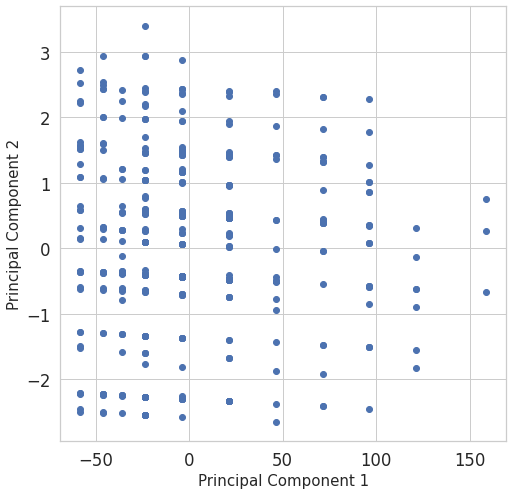

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal component 1']
               , pf['principal component 2'])

Text(0, 0.5, 'WCSS')

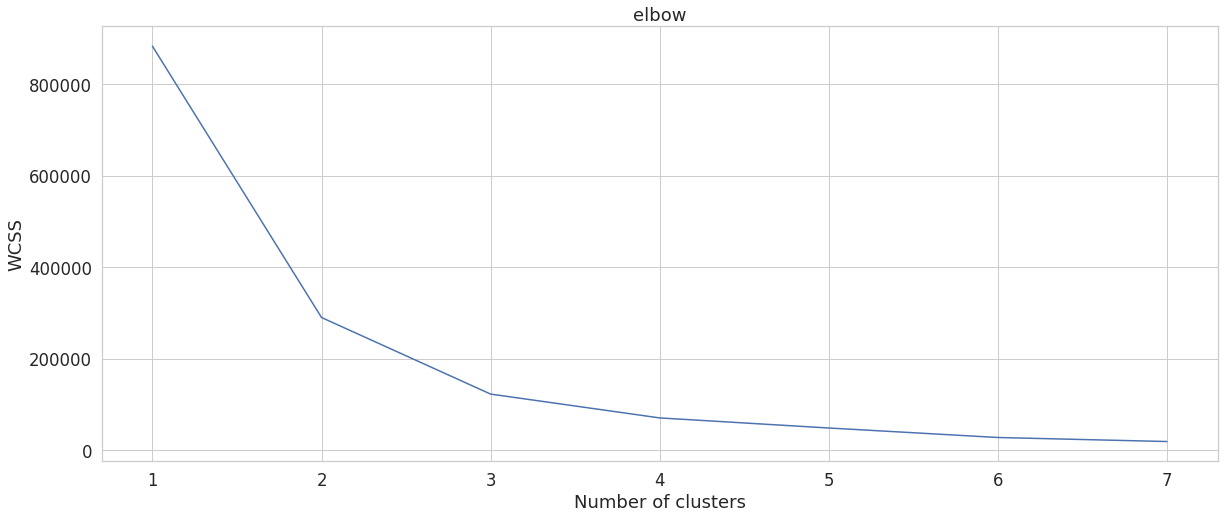

In [ ]:
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
kmeansp = kmeans.predict(x)

In [ ]:
labels = kmeans.labels_
print(labels[:100])

[0 1 1 1 0 1 1 1 0 0 2 0 0 0 1 0 1 0 2 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 2 0 1 2 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 2 1
 1 1 1 1 0 0 1 2 0 2 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1]


In [ ]:
df3['cluster_num'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

,age_cat,new_sal,own,MARITAL_STATUS_CODE,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,cluster_num
0,5,42.0,0,0,2,0,0
1,3,62.0,0,0,2,0,1
3,1,87.0,0,2,4,2,1
4,3,62.0,0,1,1,0,1
5,5,7.5,0,1,2,0,0
...,...,...,...,...,...,...,...
792,3,87.0,0,1,1,0,1
794,3,42.0,0,1,1,0,0
795,2,62.0,0,0,2,0,1
796,2,62.0,0,2,2,0,1


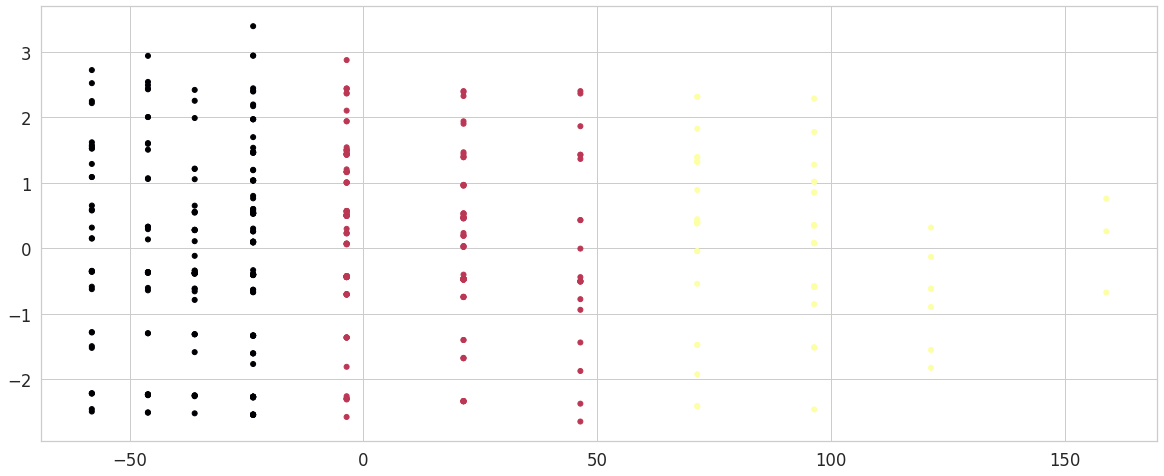

In [ ]:
plt.scatter(pf['principal component 1'], pf['principal component 2'], c=kmeansp, s=25, cmap='inferno')

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


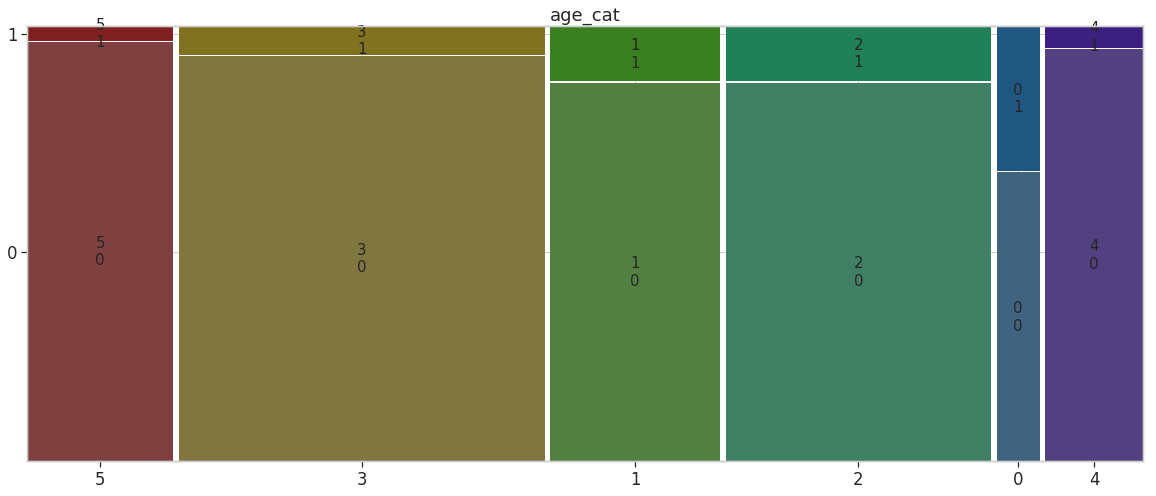

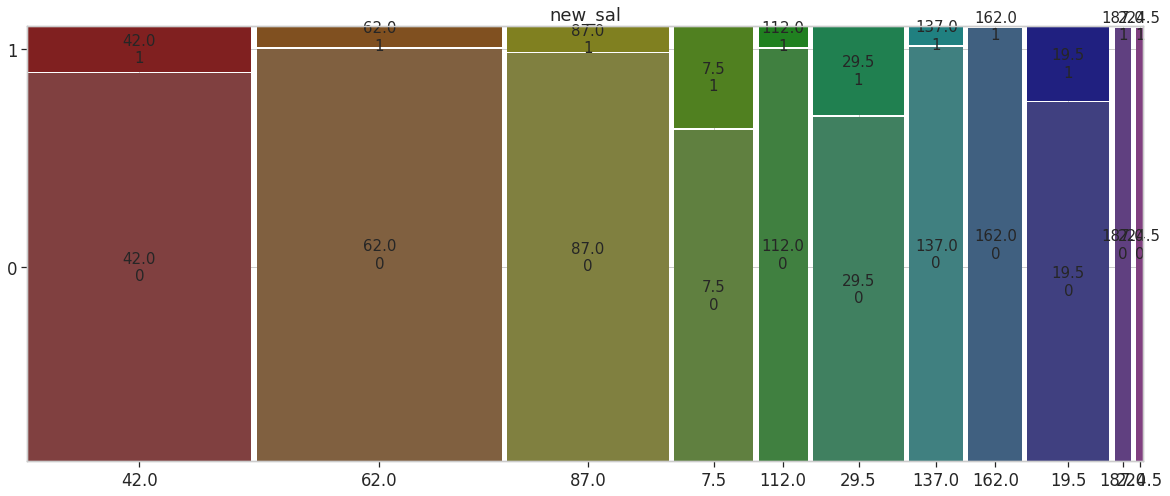

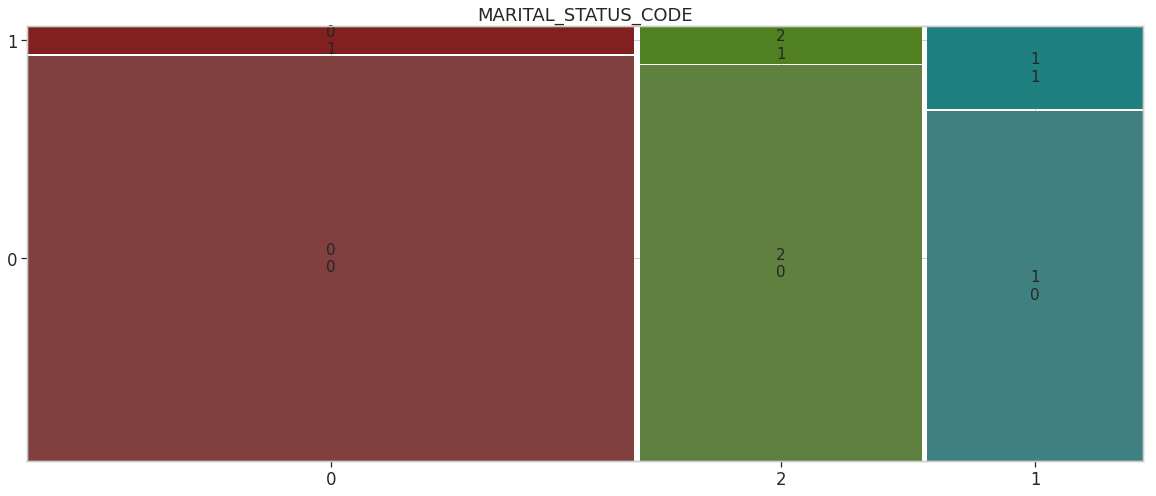

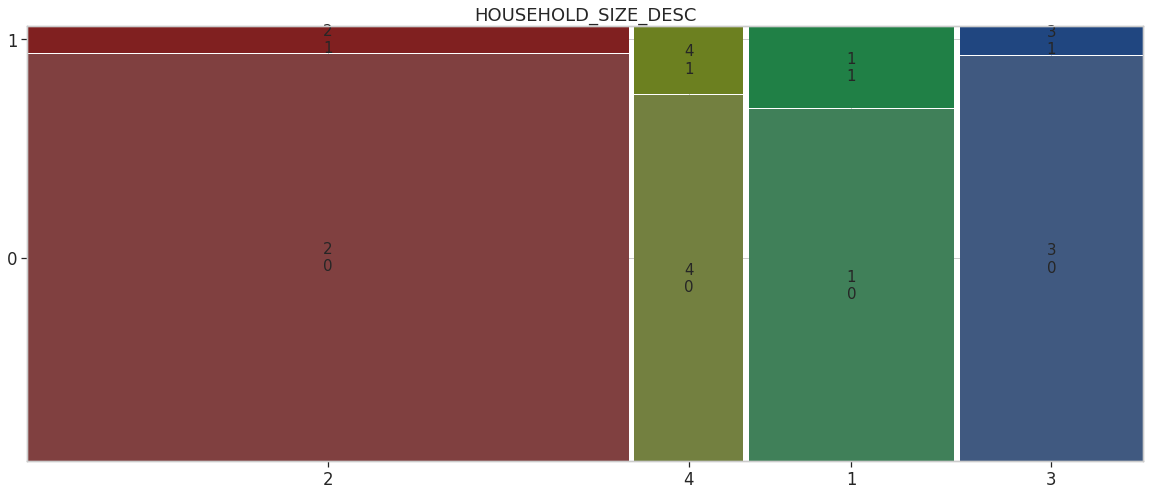

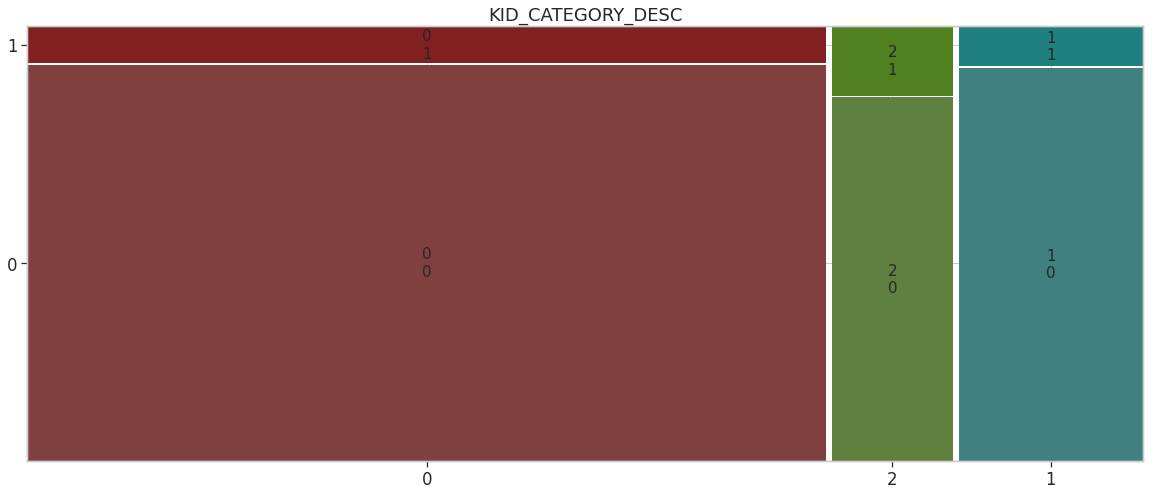

In [ ]:
for i in ['age_cat','new_sal','MARITAL_STATUS_CODE','HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC']:

  mosaic(df3,[i , 'own'],title = i)
  plt.show()

In [ ]:
m2  = df3.groupby(df3['cluster_num'])
m2.mean()

,age_cat,new_sal,own,MARITAL_STATUS_CODE,KID_CATEGORY_DESC
cluster_num,,,,,
0,2.799020,30.000000,0.156863,0.779412,0.357843
1,2.605128,76.230769,0.051282,0.635897,0.415385
2,2.535714,158.205357,0.017857,0.678571,0.392857


In [ ]:
m2.max()

,age_cat,new_sal,own,MARITAL_STATUS_CODE,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
cluster_num,,,,,,
0,5,42.0,1,2,4,2
1,5,112.0,1,2,4,2
2,5,224.5,1,2,4,2


In [ ]:
m2.min()

,age_cat,new_sal,own,MARITAL_STATUS_CODE,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
cluster_num,,,,,,
0,0,7.5,0,0,1,0
1,0,62.0,0,0,1,0
2,1,137.0,0,0,1,0


cluster_num
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
2    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

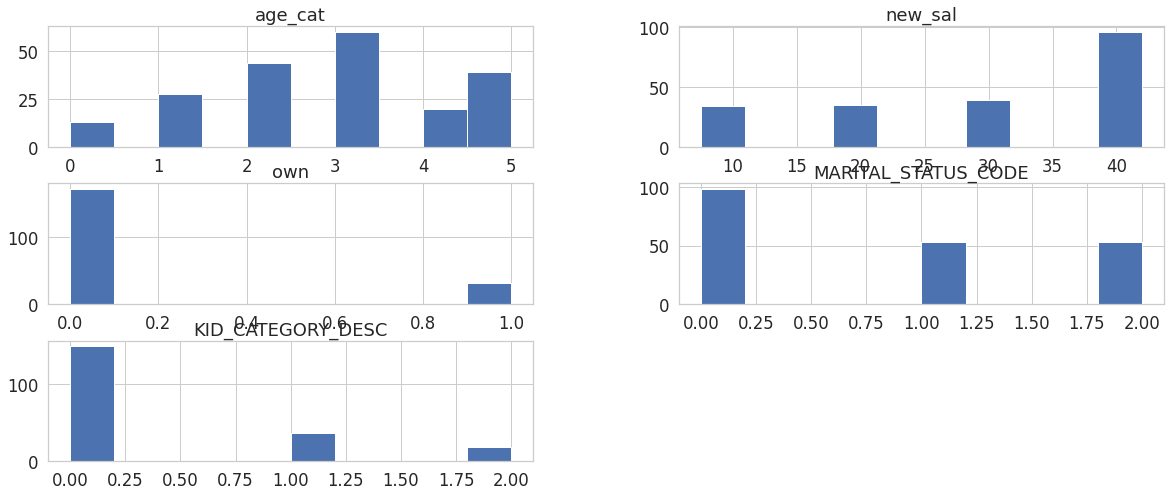

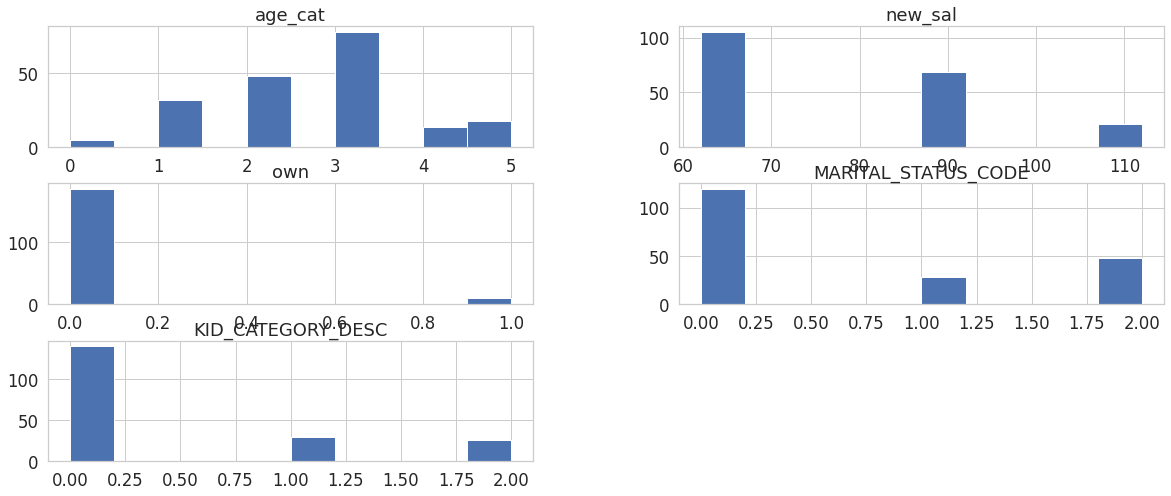

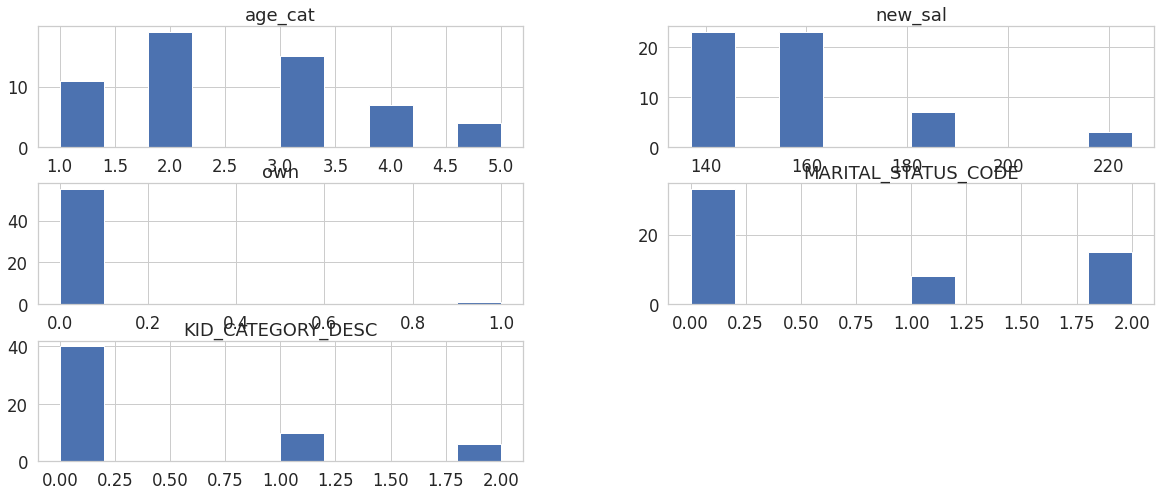

In [ ]:
m2.hist()

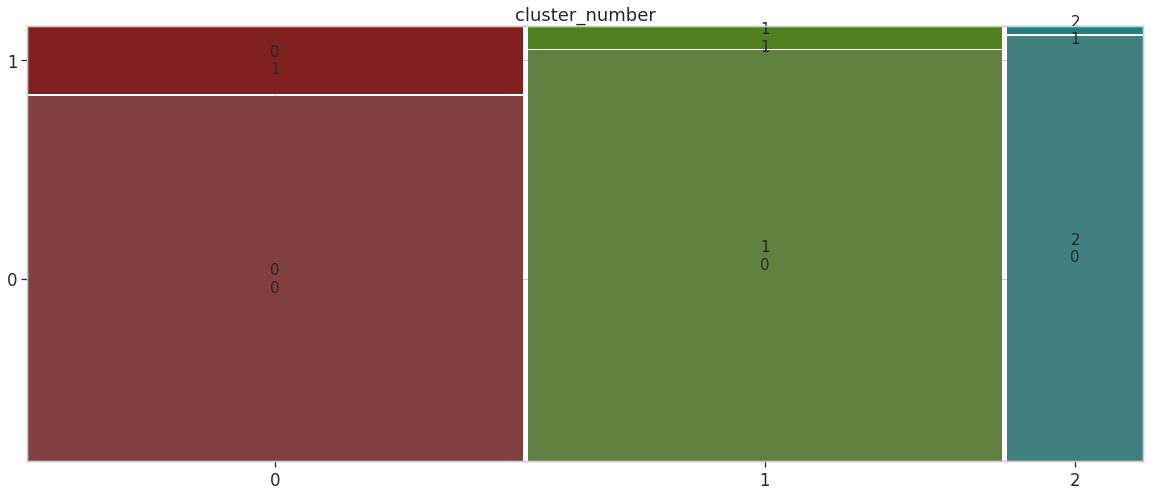

In [ ]:
  mosaic(df3,['cluster_num', 'own'],title = 'cluster_number')
  plt.show()